## 텐서플로우의 model.save_weights 함수를 이용하여 학습된 가중치(weights)를 저장하고 다시 불러오는 예제입니다.  
### 예시는 가중치 저장 과정과 불러오기 흐름을 이해하기 위한 예제이므로 학습 데이터는 1000 개만 사용 합니다.

### 텐서플로우 학습된 가중치만 저장하고 불러오기 예제


In [1]:
# Model Weights Save
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import os
import tensorflow as tf
from tensorflow import keras


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]  # Training target max 1000 
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

print(train_images, train_labels)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9
 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6
 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1
 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2 1 1 8 3 6 1 0 3 1 0 0 1 7 2 7 3 0 4 6 5 2 6
 4 7 1 8 9 9 3 0 7 1 0 2 0 3 5 4 6 5 8 6 3 7 5 8 0 9 1 0 3 1 2 2 3 3 6 4 7
 5 0 6 2 7 9 8 5 9 2 1 1 4 4 5 6 4 1 2 5 3 9 3 9 0 5 9 6 5 7 4 1 3 4 0 4 8
 0 4 3 6 8 7 6 0 9 7 5 7 2 1 1 6 8 9 4 1 5 2 2 9 0 3 9 6 7 2 0 3 5 4 3 6 5
 8 9 5 4 7 4 2 7 3 4 8 9 1 9 2 8 7 9 1 8 7 4 1 3 1 1 0 2 3 9 4 9 2 1 6 8 4
 7 7 4 4 9 2 5 7 2 4 4 2 1 9 7 2 8 7 6 9 2 2 3 8 1 6 5 1 1 0 2 6 4 5 8 3 1
 5 1 9 2 7 4 4 4 8 

In [3]:
# Model Sequential Function
def create_model():
     model = tf.keras.models.Sequential([
     keras.layers.Dense(512, activation='relu', input_shape=(784,)),
     keras.layers.Dense(0.2),
     keras.layers.Dense(10, activation='softmax')
     ])

     model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

     return model

model = create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 0)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10        
Total params: 401,930
Trainable params: 401,930
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Model save_weights
model.save_weights('.\\checkpoints\\my_only_checkpoint')

# weights evaluate
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('CheckPoint Training accuracy: {:5.2f}%'.format((100*acc)))

32/32 - 0s - loss: 2.3026 - accuracy: 0.0850
CheckPoint Training accuracy:  8.50%


In [7]:
# Restore weights
model = create_model()
model.load_weights('.\\checkpoints\\my_only_checkpoint')

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restore weights : {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 2.3026 - accuracy: 0.0850
Restore weights :  8.50%


## Converted model from pytorch to keras h5

https://stackoverflow.com/questions/68002742/converted-model-from-keras-h5-to-pytorch-fully-connected-layer-mismatch

https://yunmorning.tistory.com/m/17

https://github.com/PINTO0309/PINTO_model_zoo/tree/main/307_YOLOv7

### (Pytorch -> onnx) to tensorRT ?? BERT
https://blog.si-analytics.ai/m/32
### yolov5 to onnx
https://blog.hbsmith.io/c-%EA%B8%B0%EB%B0%98-%EB%B0%B0%ED%8F%AC-%EA%B0%80%EB%8A%A5%ED%95%9C-%EB%94%A5%EB%9F%AC%EB%8B%9D-%EA%B0%9D%EC%B2%B4-%EA%B0%90%EC%A7%80-%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8-%EA%B0%9C%EB%B0%9C-feat-yolo-v5-2-3310b8d81a82

### Import an onnx model from tensorflow
https://thenewstack.io/tutorial-import-an-onnx-model-into-tensorflow-for-inference/

In [3]:
!pip install onnx

In [6]:
tf.__version__

'1.15.0'

In [13]:
!pip install tensorflow_probability

     ---------------------------------------- 6.6/6.6 MB 10.8 MB/s eta 0:00:00
     ---------------------------------------- 91.2/91.2 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 1.15.2 requires gast==0.2.2, but you have gast 0.5.3 which is incompatible.


In [5]:
import tensorflow as tf
import onnx
from onnx_tf.backend import prepare


C:\Users\etriai08\.conda\envs\t\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 1.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


ImportError: cannot import name 'keras_tensor' from 'tensorflow.python.keras.engine' (C:\Users\etriai08\.conda\envs\t\lib\site-packages\tensorflow_core\python\keras\engine\__init__.py)

In [15]:
file_path = "datasets\\onnx\\onnx_coco_hyp.p6_best\\"
file = "coco_hyp.p6_best"


In [16]:
onnx_model = onnx.load(file_path+file+".onnx")

AttributeError: module 'tensorflow_core._api.v2.train' has no attribute 'GradientDescentOptimizer'

많은 예제들이 tensorflow 1.x 버전을 기준으로 작성되어 tensorflow 2.0 최신버전으로 설치돼 위와같은 에러 등 제대로 실행이 안되는 문제가 있을것으로 생각됩니다

#### 방법 1

In [17]:
tf_rep = onnx.prepare(onnx_model)
pbfile = file_path+file+"_on_"".pb"
tf_rep.export_graph(pbfile)

AttributeError: module 'onnx' has no attribute 'prepare'

#### 방법 2

In [12]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.train.write_graph(onnx_model, file_path, file+".pb", as_text=False)

Instructions for updating:
non-resource variables are not supported in the long term


'datasets\\onnx\\onnx_coco_hyp.p6_best\\coco_hyp.p6_best.pb'

In [4]:
#IMAGE_PATH="datasets\\VisDrone_Reduction\\images\\test\\0000006_00159_d_0000001.jpg"
PB_PATH=file_path+file+".pb"
print(IMAGE_PATH,"\n", PB_PATH)

datasets\VisDrone_Reduction\images\test\0000006_00159_d_0000001.jpg 
 datasets\onnx\onnx_coco_hyp.p6_best\coco_hyp.p6_best.pb


# https://netron.app/
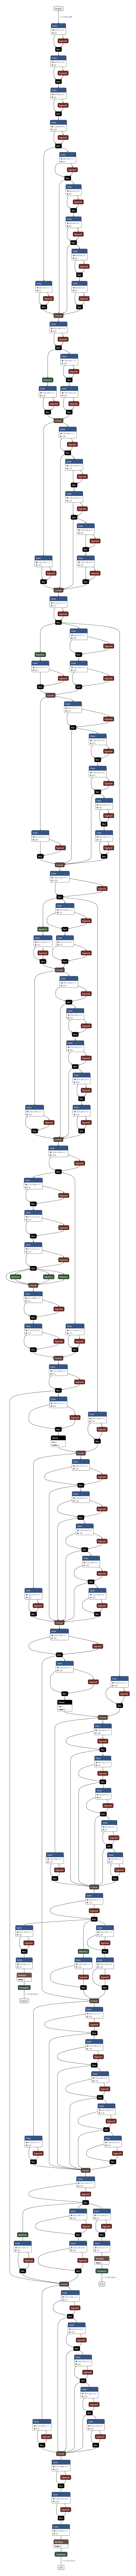

###############################################

In [47]:
file_path+file+".pb"

'datasets\\onnx\\onnx_coco_hyp.p6_best\\coco_hyp.p6_best.pb'

In [75]:
model = tf.keras.models.load_model("C:\\Users\\etriai08\\Desktop\\E1015\\datasets\\onnx")

OSError: SavedModel file does not exist at: C:\Users\etriai08\Desktop\E1015\datasets\onnx/{saved_model.pbtxt|saved_model.pb}

In [ ]:
from tensorflow.keras.models import save_model, Sequential


In [ ]:
model = create_model()
model.('.\\checkpoints\\my_only_checkpoint')

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restore weights : {:5.2f}%".format(100*acc))

In [36]:
import numpy as np
import cv2
 
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
 
INPUT_TENSOR_NAME = 'input.1:0'
OUTPUT_TENSOR_NAME = 'add_4:0'

"""
이미지 화면 출력
imshow() 함수를 이용하여 이미지를 모니터에 보여줍니다.
cv2.imshow(winname, filename) → None
"""
img = cv2.imread(IMAGE_PATH)
#img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
if img is None: 
    print('Image load failed') 
else:
    cv2.imshow("image",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

In [ ]:
img = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_AREA)
img.resize((1, 1, 28, 28))


with tf.gfile.FastGFile(PB_PATH, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.Graph().as_default() as graph:
    tf.import_graph_def(graph_def, name="")

input_tensor = graph.get_tensor_by_name(INPUT_TENSOR_NAME)
output_tensor = graph.get_tensor_by_name(OUTPUT_TENSOR_NAME)
 
with tf.Session(graph=graph) as sess:
    output_vals = sess.run(output_tensor, feed_dict={input_tensor: img})  #
    
prediction=int(np.argmax(np.array(output_vals).squeeze(), axis=0))
print(prediction)

In [11]:
tf.__version__

'2.3.0'

## Model transfer learning & fine tunning
https://www.tensorflow.org/tutorials/images/transfer_learning?hl=ko